# Using JuMP Models

> Picking a good linear solver is **extremely important** to maximize the performance of nonlinear solvers. For the best results, it is advised to experiment different linear solvers.

> Those results are set with the linear solver `MA57`.

## ---Trapzoidal integration rule---

In [1]:
using JuMP , Ipopt
import HSL_jll
include("../Problems/JuMP/space_Shuttle_JMP.jl")
SpaceShuttleJMP = space_Shuttle_JMP("trapezoidal")

set_optimizer(SpaceShuttleJMP,Ipopt.Optimizer)
set_attribute(SpaceShuttleJMP, "hsllib", HSL_jll.libhsl_path)
set_attribute(SpaceShuttleJMP, "linear_solver", "ma57")


In [2]:
optimize!(SpaceShuttleJMP) #~ 9 min


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.14, running with linear solver ma57.

Number of nonzeros in equality constraint Jacobian...:  1535081
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:  4710423

Total number of variables............................:     4015
                     variables with only lower bounds:     1002
                variables with lower and upper bounds:     2009
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3012
Total number of inequality constrai

In [3]:
@assert is_solved_and_feasible(SpaceShuttleJMP)

# Show final cross-range of the solution
println(
    "Final latitude θ = ",
    round(objective_value(SpaceShuttleJMP) |> rad2deg; digits = 2),
    "°",
)

Final latitude θ = 89.0°


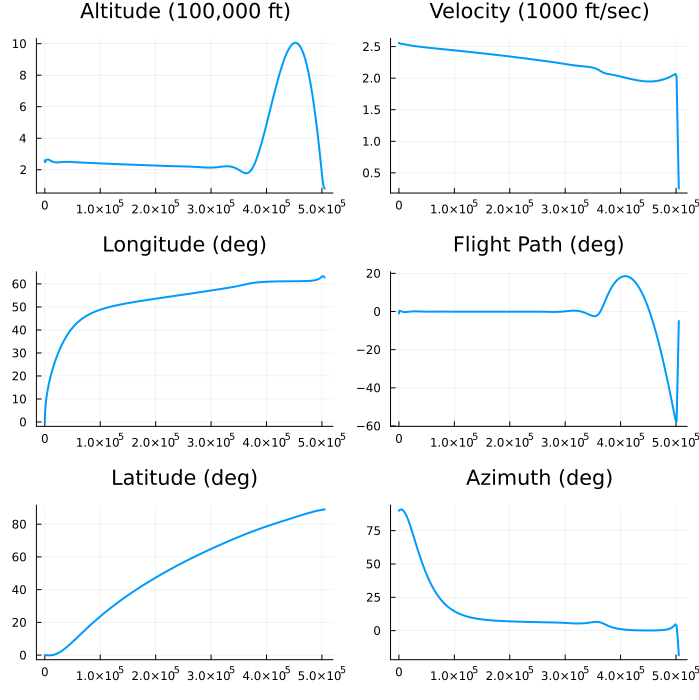

In [10]:
using Plots
n=503
scaled_h = SpaceShuttleJMP[:scaled_h]
scaled_v = SpaceShuttleJMP[:scaled_v]
ϕ = SpaceShuttleJMP[:ϕ]
θ = SpaceShuttleJMP[:θ]
γ = SpaceShuttleJMP[:γ]
ψ = SpaceShuttleJMP[:ψ]
Δt = 4.0 *(1:n)
ts = cumsum([0; value.(Δt)])[1:end-1]
plt_altitude = plot(
    ts,
    value.(scaled_h);
    legend = nothing,
    title = "Altitude (100,000 ft)",
)
plt_longitude =
    plot(ts, rad2deg.(value.(ϕ)); legend = nothing, title = "Longitude (deg)")
plt_latitude =
    plot(ts, rad2deg.(value.(θ)); legend = nothing, title = "Latitude (deg)")
plt_velocity = plot(
    ts,
    value.(scaled_v);
    legend = nothing,
    title = "Velocity (1000 ft/sec)",
)
plt_flight_path =
    plot(ts, rad2deg.(value.(γ)); legend = nothing, title = "Flight Path (deg)")
plt_azimuth =
    plot(ts, rad2deg.(value.(ψ)); legend = nothing, title = "Azimuth (deg)")

plot(
    plt_altitude,
    plt_velocity,
    plt_longitude,
    plt_flight_path,
    plt_latitude,
    plt_azimuth;
    layout = grid(3, 2),
    linewidth = 2,
    size = (700, 700),
)

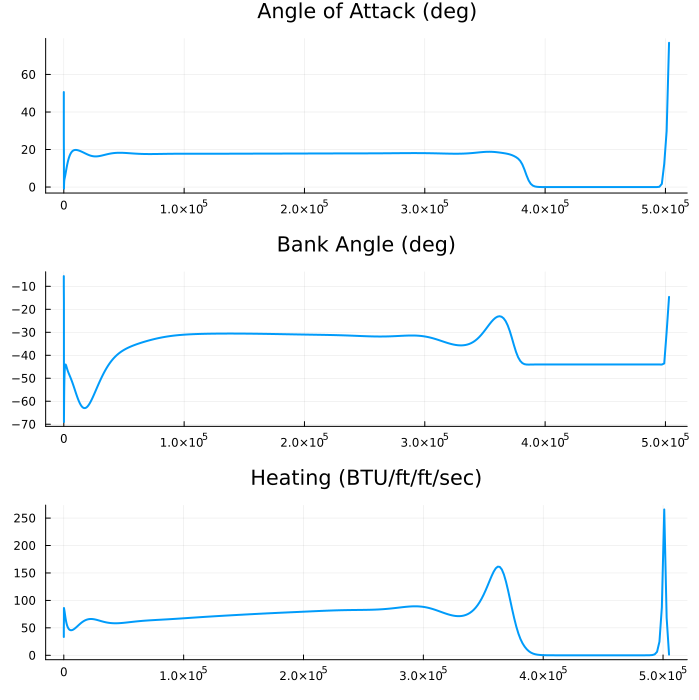

In [16]:
α = SpaceShuttleJMP[:α]
β = SpaceShuttleJMP[:β]
c₀ = 1.0672181
c₁ = -0.19213774e-1
c₂ = 0.21286289e-3
c₃ = -0.10117249e-5
ρ₀ = 0.002378
hᵣ = 23800.0
function q(h, v, a)
    ρ(h) = ρ₀ * exp(-h / hᵣ)
    qᵣ(h, v) = 17700 * √ρ(h) * (0.0001 * v)^3.07
    qₐ(a) = c₀ + c₁ * rad2deg(a) + c₂ * rad2deg(a)^2 + c₃ * rad2deg(a)^3
    # Aerodynamic heating on the vehicle wing leading edge
    return qₐ(a) * qᵣ(h, v)
end

plt_attack_angle = plot(
    ts[1:end-1],
    rad2deg.(value.(α)[1:end-1]);
    legend = nothing,
    title = "Angle of Attack (deg)",
)
plt_bank_angle = plot(
    ts[1:end-1],
    rad2deg.(value.(β)[1:end-1]);
    legend = nothing,
    title = "Bank Angle (deg)",
)
plt_heating = plot(
    ts,
    q.(value.(scaled_h) * 1e5, value.(scaled_v) * 1e4, value.(α));
    legend = nothing,
    title = "Heating (BTU/ft/ft/sec)",
)

plot(
    plt_attack_angle,
    plt_bank_angle,
    plt_heating;
    layout = grid(3, 1),
    linewidth = 2,
    size = (700, 700),
)

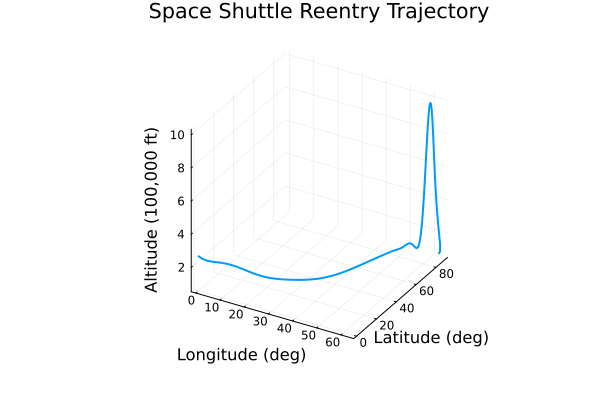

In [17]:
plot(
    rad2deg.(value.(ϕ)),
    rad2deg.(value.(θ)),
    value.(scaled_h);
    linewidth = 2,
    legend = nothing,
    title = "Space Shuttle Reentry Trajectory",
    xlabel = "Longitude (deg)",
    ylabel = "Latitude (deg)",
    zlabel = "Altitude (100,000 ft)",
)

## ---Rectangular integration rule---

In [18]:
using JuMP , Ipopt
import HSL_jll
include("../Problems/JuMP/space_Shuttle_JMP.jl")
SpaceShuttleJMP = space_Shuttle_JMP()

set_optimizer(SpaceShuttleJMP,Ipopt.Optimizer)
set_attribute(SpaceShuttleJMP, "hsllib", HSL_jll.libhsl_path)
set_attribute(SpaceShuttleJMP, "linear_solver", "ma57")


In [19]:
optimize!(SpaceShuttleJMP)

This is Ipopt version 3.14.14, running with linear solver ma57.

Number of nonzeros in equality constraint Jacobian...:    18044
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:    36580

Total number of variables............................:     4015
                     variables with only lower bounds:     1002
                variables with lower and upper bounds:     2009
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3012
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 2.62e+03 1.05e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   

In [20]:
@assert is_solved_and_feasible(SpaceShuttleJMP)

# Show final cross-range of the solution
println(
    "Final latitude θ = ",
    round(objective_value(SpaceShuttleJMP) |> rad2deg; digits = 2),
    "°",
)

Final latitude θ = 34.18°


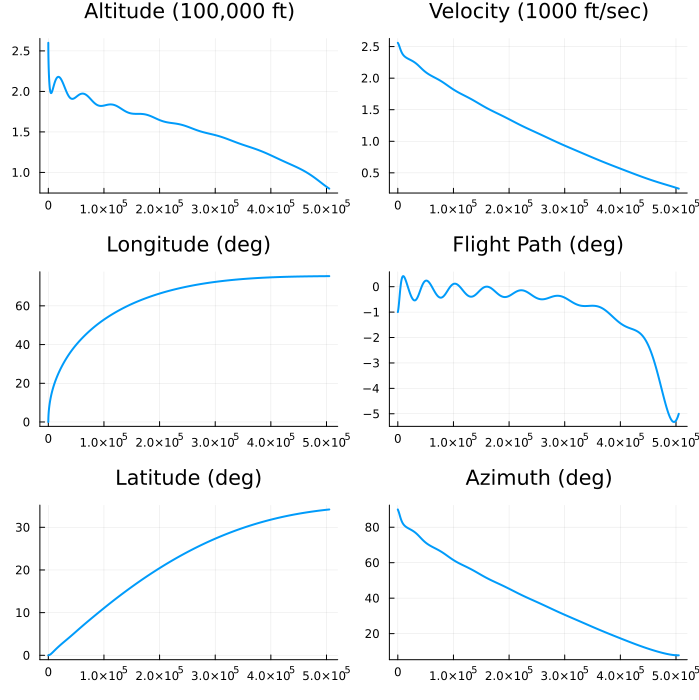

In [22]:
using Plots
n=503
scaled_h = SpaceShuttleJMP[:scaled_h]
scaled_v = SpaceShuttleJMP[:scaled_v]
ϕ = SpaceShuttleJMP[:ϕ]
θ = SpaceShuttleJMP[:θ]
γ = SpaceShuttleJMP[:γ]
ψ = SpaceShuttleJMP[:ψ]
Δt = 4.0 *(1:n)
ts = cumsum([0; value.(Δt)])[1:end-1]
plt_altitude = plot(
    ts,
    value.(scaled_h);
    legend = nothing,
    title = "Altitude (100,000 ft)",
)
plt_longitude =
    plot(ts, rad2deg.(value.(ϕ)); legend = nothing, title = "Longitude (deg)")
plt_latitude =
    plot(ts, rad2deg.(value.(θ)); legend = nothing, title = "Latitude (deg)")
plt_velocity = plot(
    ts,
    value.(scaled_v);
    legend = nothing,
    title = "Velocity (1000 ft/sec)",
)
plt_flight_path =
    plot(ts, rad2deg.(value.(γ)); legend = nothing, title = "Flight Path (deg)")
plt_azimuth =
    plot(ts, rad2deg.(value.(ψ)); legend = nothing, title = "Azimuth (deg)")

plot(
    plt_altitude,
    plt_velocity,
    plt_longitude,
    plt_flight_path,
    plt_latitude,
    plt_azimuth;
    layout = grid(3, 2),
    linewidth = 2,
    size = (700, 700),
)

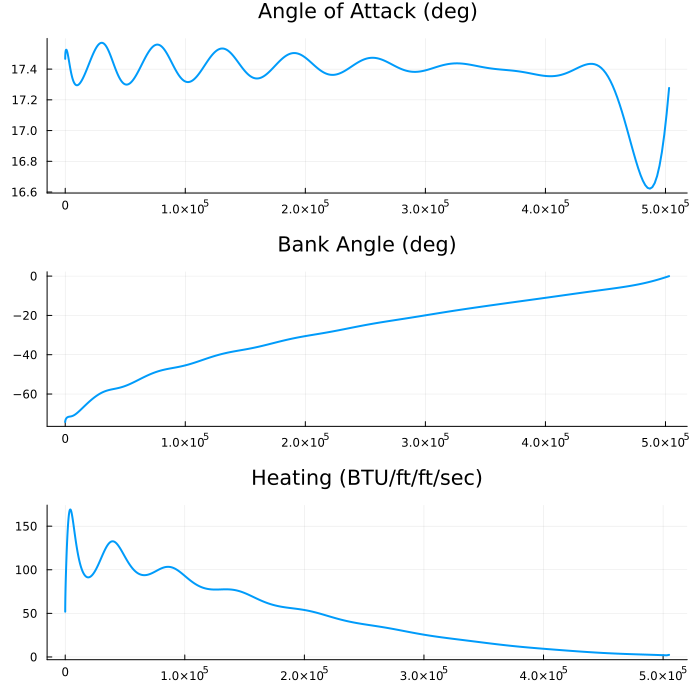

In [23]:
α = SpaceShuttleJMP[:α]
β = SpaceShuttleJMP[:β]
c₀ = 1.0672181
c₁ = -0.19213774e-1
c₂ = 0.21286289e-3
c₃ = -0.10117249e-5
ρ₀ = 0.002378
hᵣ = 23800.0
function q(h, v, a)
    ρ(h) = ρ₀ * exp(-h / hᵣ)
    qᵣ(h, v) = 17700 * √ρ(h) * (0.0001 * v)^3.07
    qₐ(a) = c₀ + c₁ * rad2deg(a) + c₂ * rad2deg(a)^2 + c₃ * rad2deg(a)^3
    # Aerodynamic heating on the vehicle wing leading edge
    return qₐ(a) * qᵣ(h, v)
end

plt_attack_angle = plot(
    ts[1:end-1],
    rad2deg.(value.(α)[1:end-1]);
    legend = nothing,
    title = "Angle of Attack (deg)",
)
plt_bank_angle = plot(
    ts[1:end-1],
    rad2deg.(value.(β)[1:end-1]);
    legend = nothing,
    title = "Bank Angle (deg)",
)
plt_heating = plot(
    ts,
    q.(value.(scaled_h) * 1e5, value.(scaled_v) * 1e4, value.(α));
    legend = nothing,
    title = "Heating (BTU/ft/ft/sec)",
)

plot(
    plt_attack_angle,
    plt_bank_angle,
    plt_heating;
    layout = grid(3, 1),
    linewidth = 2,
    size = (700, 700),
)

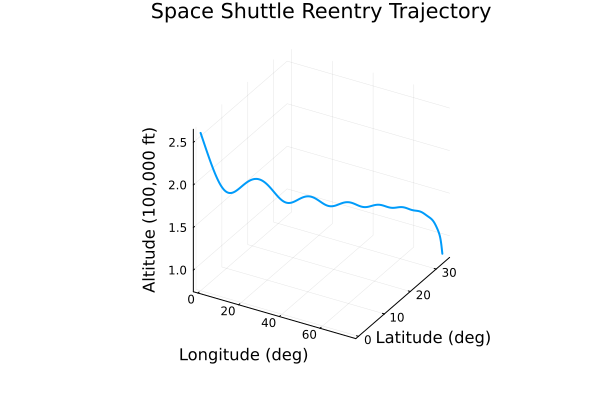

In [24]:
plot(
    rad2deg.(value.(ϕ)),
    rad2deg.(value.(θ)),
    value.(scaled_h);
    linewidth = 2,
    legend = nothing,
    title = "Space Shuttle Reentry Trajectory",
    xlabel = "Longitude (deg)",
    ylabel = "Latitude (deg)",
    zlabel = "Altitude (100,000 ft)",
)

>>##### The rectangular integration rule and the trapezoidal integration rule do not provide the same results.
>>##### Time wise, the rectangular integration rule is 5 times faster than the trapezoidal integration rule.

# Using OptimalControl Mdels

>##### The OptimalControlModel for this problem is defined. It probably cannot be used for now because OC.jl uses the trapezoidal integration rule.

In [1]:
using OptimalControl
include("../Problems/OptimalControl/space_Shuttle_OC.jl")
SpaceShuttleOC = space_Shuttle_OC();

In [2]:
SpaceShuttleOC


The (autonomous) optimal control problem is given by:

    w = 203000.0
    g₀ = 32.174
    m = w / g₀
    ρ₀ = 0.002378
    hᵣ = 23800.0
    Rₑ = 2.09029e7
    μ = 1.4076539e16
    S = 2690.0
    a₀ = -0.20704
    a₁ = 0.029244
    b₀ = 0.07854
    b₁ = -0.0061592
    b₂ = 0.000621408
    c₀ = 1.0672181
    c₁ = -0.019213774
    c₂ = 0.00021286289
    c₃ = -1.0117249e-6
    h_s = 2.6 * 100000.0
    ϕ_s = deg2rad(0)
    θ_s = deg2rad(0)
    v_s = 2.56 * 10000.0
    γ_s = deg2rad(-1)
    ψ_s = deg2rad(90)
    α_s = deg2rad(0)
    β_s = deg2rad(0)
    t_s = 1.0
    h_t = 0.8 * 100000.0
    v_t = 0.25 * 10000.0
    γ_t = deg2rad(-5)
    tf = 2009.0
    t0 = 0.0
    t ∈ [t0, tf], time
    x ∈ R⁶, state
    u ∈ R², control
    h = x₁
    ϕ = x₂
    θ = x₃
    v = x₄
    γ = x₅
    ψ = x₆
    α = u₁
    β = u₂
    h(t) ≥ 0, h_con
    deg2rad(-89) ≤ θ(t) ≤ deg2rad(89), θ_con
    v(t) ≥ 0.0001, v_con
    deg2rad(-89) ≤ γ(t) ≤ deg2rad(89), γ_con
    deg2rad(-89) ≤ β(t) ≤ deg2rad(1), β_con
    


┌────────┬────────┬──────────┬──────────┬───────────┬────────────┬─────────────┐
│ times* │ state* │ control* │ variable │ dynamics* │ objective* │ constraints │
├────────┼────────┼──────────┼──────────┼───────────┼────────────┼─────────────┤
│     ✅ │     ✅ │       ✅ │       ❌ │        ✅ │         ✅ │          ✅ │
└────────┴────────┴──────────┴──────────┴───────────┴────────────┴─────────────┘


In [3]:
import Interpolations
using CTBase
 ## Initial conditions
 h_s = 2.6          # altitude (ft) / 1e5
 ϕ_s = deg2rad(0)   # longitude (rad)
 θ_s = deg2rad(0)   # latitude (rad)
 v_s = 2.56         # velocity (ft/sec) / 1e4
 γ_s = deg2rad(-1)  # flight path angle (rad)
 ψ_s = deg2rad(90)  # azimuth (rad)
 α_s = deg2rad(0)   # angle of attack (rad)
 β_s = deg2rad(0)   # bank angle (rad)
 t_s = 1.00         # time step (sec)

 ## Final conditions, the so-called Terminal Area Energy Management (TAEM)
 h_t = 0.8          # altitude (ft) / 1e5
 v_t = 0.25         # velocity (ft/sec) / 1e4
 γ_t = deg2rad(-5)  # flight path angle (rad)

 ## Number of mesh points (knots) to be used
 n = 503

x_s = [h_s, ϕ_s, θ_s, v_s, γ_s, ψ_s, α_s, β_s]
x_t = [h_t, ϕ_s, θ_s, v_t, γ_t, ψ_s, α_s, β_s]
interp_linear = Interpolations.LinearInterpolation([1, n], [x_s, x_t])
initial_guess = mapreduce(transpose, vcat, interp_linear.(1:n))

xinit = initial_guess[1:6,:]
uinit = initial_guess[7:8,:]

init = CTBase.OCPInit((x_init = xinit,u_init =  uinit))


OCPInit(CTBase.var"#237#244"{Nothing}(nothing), CTBase.var"#239#246"{Nothing}(nothing), nothing, #undef, #undef, :constant_or_function)

In [4]:
import HSL_jll
include("../Problems/JuMP/space_Shuttle_JMP.jl")
sol = OptimalControl.solve(SpaceShuttleOC,init=init,linear_solver="ma57",hsllib=HSL_jll.libhsl_path)

Method = 